# Factors Affecting Borrower Rates in Prosper Loan Data Analysis
## by Felix Ehoneah Naami

## Investigation Overview

In this investigation, I analyzed the Prosper loan data to identify key factors affecting borrower rates. The analysis focused on borrower rates, stated monthly income, debt-to-income ratio, loan original amount, employment status, home ownership, verification of income, and Prosper score. 

## Dataset Overview

The Prosper loan dataset, made available by Udacity as a requirement for the final project of their Nanodegree program, comprises 113,937 loans, each containing 81 variables. These variables include information such as loan amount, borrower rate (interest rate), current loan status, borrower income, and numerous others.
The dataset can be found [here](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1677706425947762&usg=AOvVaw1RCUjXcSlITmmQLJd8vVWN) and the data dictionary explaining the various variables in the dataset can also be found [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1677706425948414&usg=AOvVaw0wLEVbH6AdpVkYb4w0Sq0P).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ProsperLoanData_cleaned.csv')
df.head()

,Unnamed: 0,ProsperScore,PercentFunded,ListingCreationDate,LoanOriginalAmount,LoanStatus,ListingCategory (numeric),BorrowerAPR,BorrowerRate,StatedMonthlyIncome,...,Occupation,Term,EmploymentStatus,DebtToIncomeRatio,MonthlyLoanPayment,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,LoanKey
0,1,7,1.0,2014-02-27 08:28:07.900,10000,Current,2,0.12016,0.0920,6125.000000,...,Professional,36,Employed,0.18,318.93,44.0,False,"$50,000-74,999",True,9E3B37071505919926B1D82
1,3,9,1.0,2012-10-22 11:02:35.010,10000,Current,16,0.12528,0.0974,2875.000000,...,Skilled Labor,36,Employed,0.15,321.45,113.0,True,"$25,000-49,999",True,A0393664465886295619C51
2,4,4,1.0,2013-09-14 18:38:39.097,15000,Current,2,0.24614,0.2085,9583.333333,...,Executive,36,Employed,0.26,563.97,44.0,True,"$100,000+",True,A180369302188889200689E
3,5,10,1.0,2013-12-14 08:26:37.093,15000,Current,1,0.15425,0.1314,8333.333333,...,Professional,60,Employed,0.36,342.37,82.0,True,"$100,000+",True,C3D63702273952547E79520
4,6,2,1.0,2013-04-12 09:52:56.147,3000,Current,1,0.31032,0.2712,2083.333333,...,Sales - Retail,36,Employed,0.27,122.67,172.0,False,"$25,000-49,999",True,CE963680102927767790520


##  Borrower Rate Distribution

The borrower rate has a unimodal distribution with a peak around 0.15, with a steep increase in frequency occurring after 0.30, indicating that a significant portion of borrowers receive interest rates above this value.

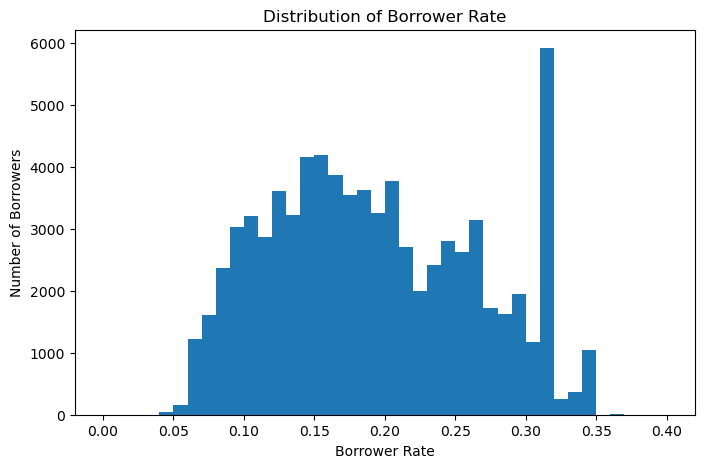

In [3]:
# Plotting the distribution of borrower rate
bins = np.arange(0, df.BorrowerRate.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate');
plt.ylabel('Number of Borrowers');
plt.title('Distribution of Borrower Rate');

## Factors Affecting Borrower Rate

The analysis found that borrower rate is negatively associated with loan original amount, and borrowers with prestigious occupations tend to receive lower rates. Additionally, employment status was identified as an important factor in evaluating a borrower's creditworthiness, and there is a weak negative correlation between borrower rate and stated monthly income, home ownership, and verification of income.

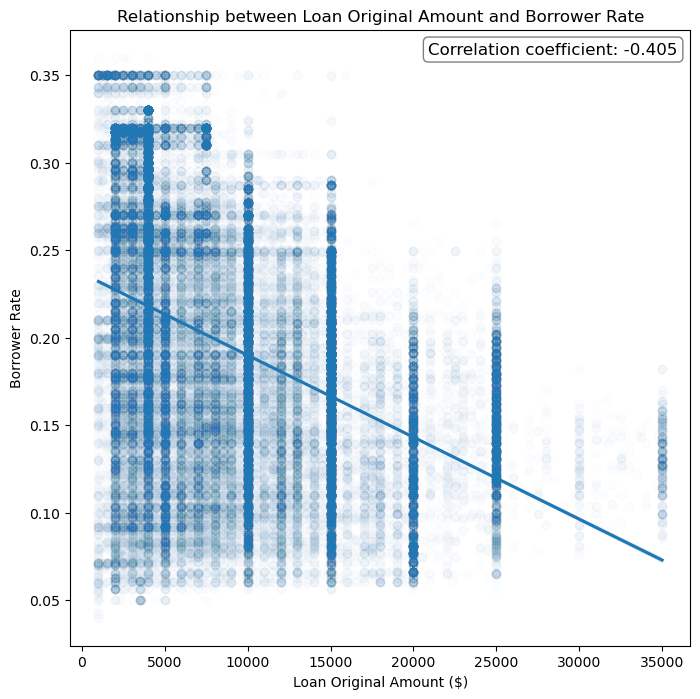

In [10]:
# Plotting the correlation between loan amount and borrower rate
plt.figure(figsize=[8, 8])
reg = sb.regplot(data=df, x='LoanOriginalAmount', y='BorrowerRate', scatter_kws={'alpha': 0.01})
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Borrower Rate')
plt.title('Relationship between Loan Original Amount and Borrower Rate')

corr_coef = np.corrcoef(df['LoanOriginalAmount'], df['BorrowerRate'])[0, 1]
textstr = f"Correlation coefficient: {corr_coef:.3f}"

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.98, textstr, transform=reg.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=props)
plt.show()


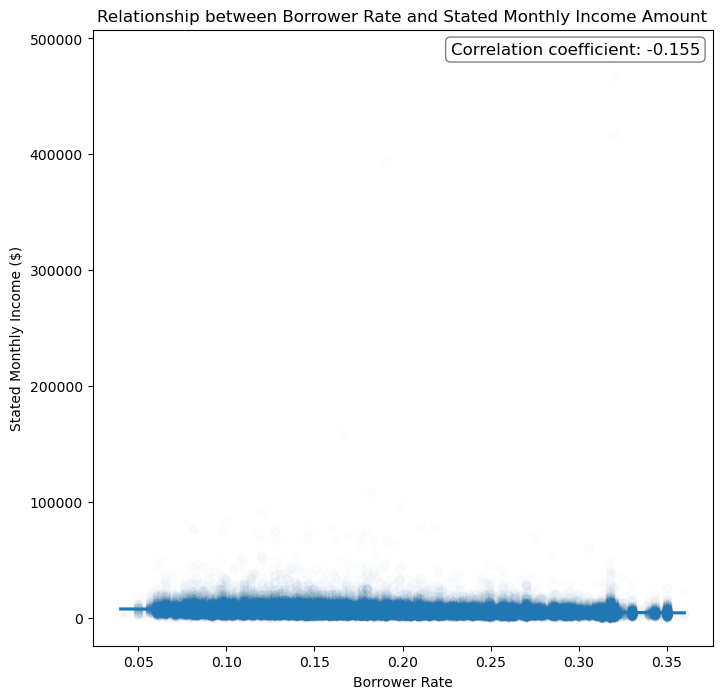

In [11]:
# Plotting the correlation between loan amount and stated monthly income 
plt.figure(figsize=[8, 8])
reg = sb.regplot(data=df, x='BorrowerRate', y='StatedMonthlyIncome', scatter_kws={'alpha': 0.01})
plt.xlabel('Borrower Rate')
plt.ylabel('Stated Monthly Income ($)')
plt.title('Relationship between Borrower Rate and Stated Monthly Income Amount')

corr_coef = np.corrcoef(df['BorrowerRate'], df['StatedMonthlyIncome'])[0, 1]
textstr = f"Correlation coefficient: {corr_coef:.3f}"

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.98, textstr, transform=reg.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()


## Loan Amount and Prosper Score

Borrowers with higher monthly income tend to receive larger loans. Homeownership is a common feature among borrowers in the dataset, regardless of employment status. When Prosper score increases, the negative relationship between borrower rate and loan amount becomes slightly positive, and the loan amount increases for all three terms. Moreover, borrower rate decreases as the borrowing term increases for individuals with lower Prosper scores, but increases with the term for those with higher scores.

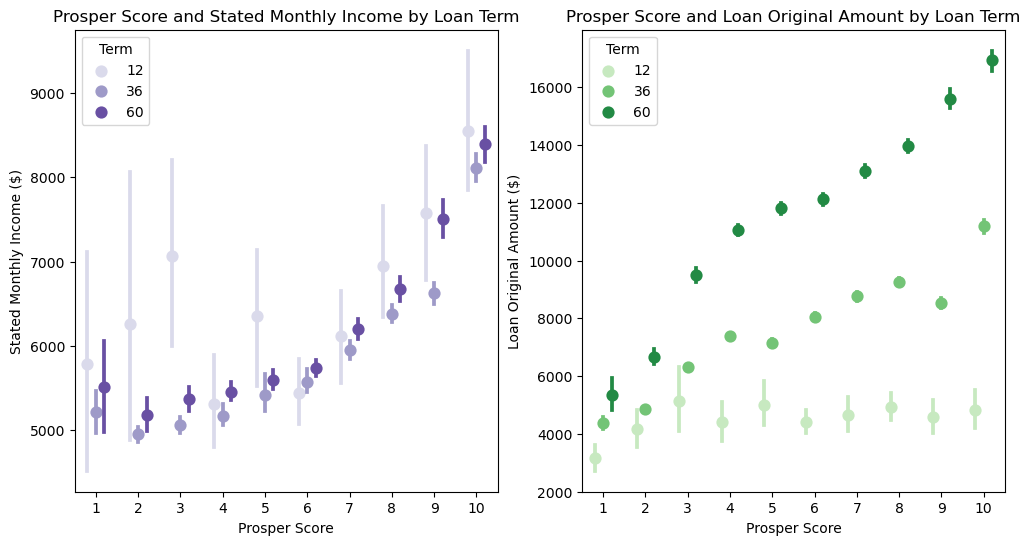

In [39]:
# Analysing the prosper score and term effects on stated monthly income and loan original amount variables
fig, ax = plt.subplots(ncols=2, figsize=[12, 6])
sb.pointplot(data=df, x='ProsperScore', y='StatedMonthlyIncome', hue='Term',
              palette='Purples', linestyles='', dodge=0.4, ax=ax[0])
ax[0].set_xlabel('Prosper Score')
ax[0].set_ylabel('Stated Monthly Income ($)')
ax[0].set_title('Prosper Score and Stated Monthly Income by Loan Term')

sb.pointplot(data=df, x='ProsperScore', y='LoanOriginalAmount', hue='Term',
              palette='Greens', linestyles='', dodge=0.4, ax=ax[1])
ax[1].set_xlabel('Prosper Score')
ax[1].set_ylabel('Loan Original Amount ($)')
ax[1].set_title('Prosper Score and Loan Original Amount by Loan Term')

plt.show()

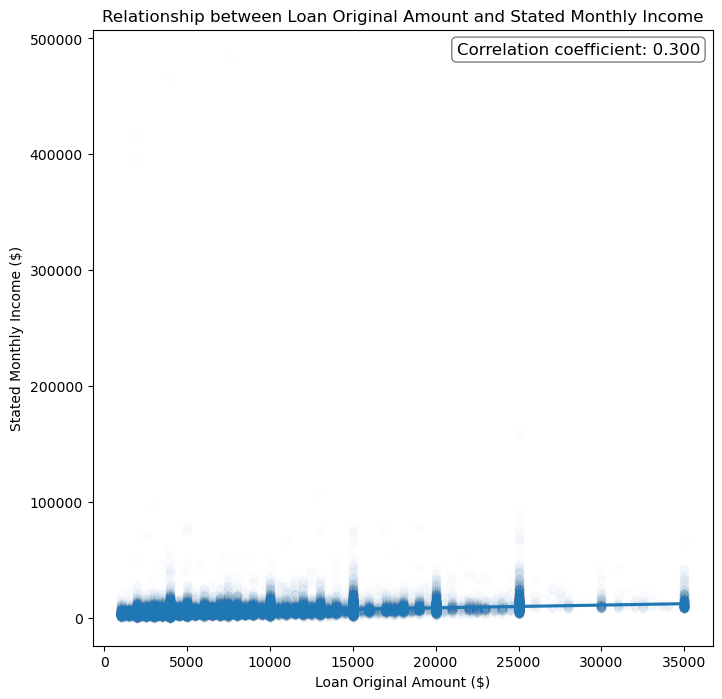

In [12]:
# Plotting the correlation between loan amount and stated monthly income 
plt.figure(figsize=[8, 8])
reg = sb.regplot(data=df, x='LoanOriginalAmount', y='StatedMonthlyIncome', scatter_kws={'alpha': 0.01})
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Stated Monthly Income ($)')
plt.title('Relationship between Loan Original Amount and Stated Monthly Income')

corr_coef = np.corrcoef(df['LoanOriginalAmount'], df['StatedMonthlyIncome'])[0, 1]
textstr = f"Correlation coefficient: {corr_coef:.3f}"

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.98, textstr, transform=reg.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()


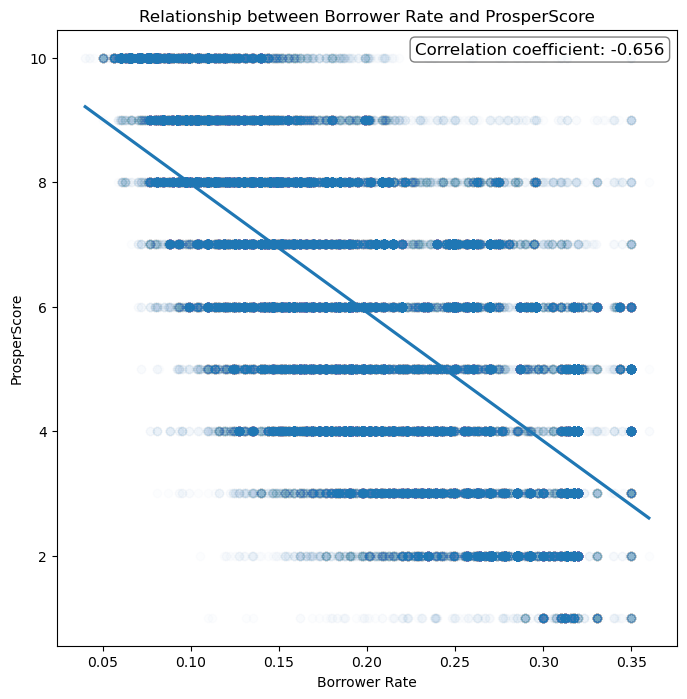

In [14]:
# Plotting the relationship between borrower rate and prosper score
plt.figure(figsize=[8, 8])
reg = sb.regplot(data=df, x='BorrowerRate', y='ProsperScore', scatter_kws={'alpha': 0.01})
plt.xlabel('Borrower Rate')
plt.ylabel('ProsperScore')
plt.title('Relationship between Borrower Rate and ProsperScore')

corr_coef = np.corrcoef(df['BorrowerRate'], df['ProsperScore'])[0, 1]
textstr = f"Correlation coefficient: {corr_coef:.3f}"

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(0.98, 0.98, textstr, transform=reg.transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='right', bbox=props)

plt.show()


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 